In [1]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
%matplotlib inline

In [2]:
df= pd.read_csv("spam.csv", encoding="latin-1")
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df['label'] = df['class'].map({'ham': 0, 'spam': 1})

Text(0, 0.5, 'count')

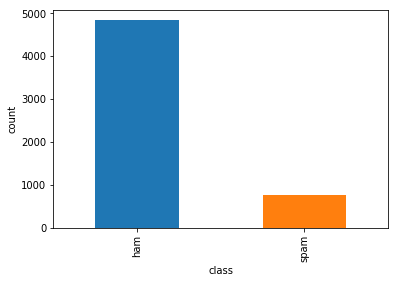

In [3]:
ax = df['class'].value_counts().plot(kind='bar')
ax.set_xlabel('class')
ax.set_ylabel('count')

In [4]:
X = df['message']
y = df['label']
cv = CountVectorizer()
X = cv.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
#Naive Bayes Classifier
naive_clf = MultinomialNB()
naive_clf.fit(X_train,y_train)
naive_clf.score(X_test,y_test)

0.9793365959760739

In [6]:
# Logistic Regression Classifier
logistic_clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
logistic_clf.score(X_test, y_test)

0.9798803697661773

In [7]:
# SVM classifier
svm_clf = SVC(gamma='auto').fit(X_train, y_train)
svm_clf.score(X_test, y_test)

0.8629690048939641

In [8]:
# Neural Network Classifier
neural_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1).fit(X_train, y_train)
neural_clf.score(X_test, y_test)

0.9831430125067971

In [9]:
def test_classifiers(text):
    print('Text:')
    print(text)
    print('Predictions:')
    # Naive Bayes prediction
    print('Naive Bayes: ', naive_clf.predict(cv.transform([text])))
    # Logistic regression prediction
    print('Logistic Regression: ', logistic_clf.predict(cv.transform([text])))
    # SVM prediction
    print('SVM:', svm_clf.predict(cv.transform([text])))
    # Neural network prediction
    print('Neural network: ', neural_clf.predict(cv.transform([text])))

In [10]:
test_classifiers('User #25384: Your Gmail profile has been compromised. Text back SENDNOW in order to reactivate your account.')
test_classifiers('Our records indicate your Pension is under performing to see higher growth and up to 25% cash release reply PENSION for a free review. To opt out reply STOP')
test_classifiers('Due to a new legislation, those struggling with debt can now apply to have it written off. For more information text the word INFO or to opt out text STOP')
test_classifiers('IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out')
test_classifiers('')

Text:
User #25384: Your Gmail profile has been compromised. Text back SENDNOW in order to reactivate your account.
Predictions:
Naive Bayes:  [1]
Logistic Regression:  [1]
SVM: [0]
Neural network:  [1]
Text:
Our records indicate your Pension is under performing to see higher growth and up to 25% cash release reply PENSION for a free review. To opt out reply STOP
Predictions:
Naive Bayes:  [1]
Logistic Regression:  [1]
SVM: [0]
Neural network:  [1]
Text:
Due to a new legislation, those struggling with debt can now apply to have it written off. For more information text the word INFO or to opt out text STOP
Predictions:
Naive Bayes:  [1]
Logistic Regression:  [1]
SVM: [0]
Neural network:  [1]
Text:
IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out
Predictions:
Naive Bayes:  [1]
Logistic Regression:  [1]
SVM: [0]
Neural network:  [1]
Text:

Predictions:
Naive Bayes:  [0]
Logistic Regressi